In [1]:
!pip install opencv-python opencv-contrib-python matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


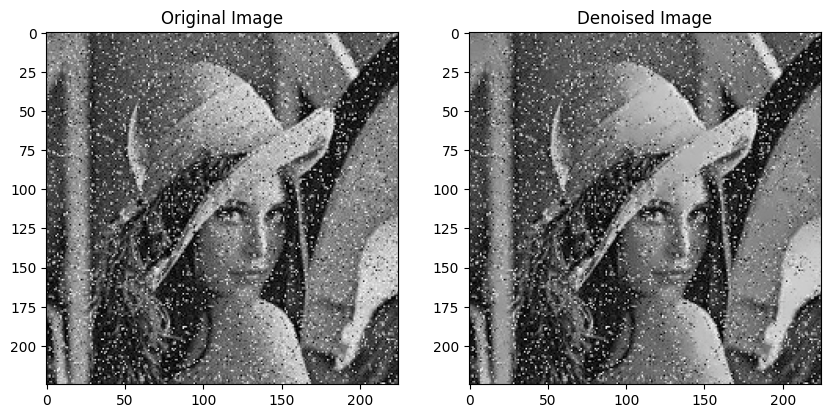

In [3]:

img = cv2.imread('nn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(122)
plt.title("Denoised Image")
plt.imshow(dst)
plt.show()


Stitching completed successfully.


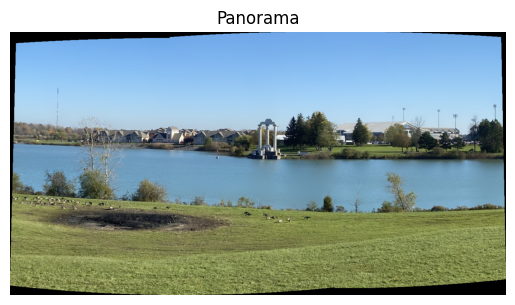

In [4]:

img1 = cv2.imread("left.jpg")
img2 = cv2.imread("right.jpg")

stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1, img2])

if status == cv2.Stitcher_OK:
    print("Stitching completed successfully.")
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Panorama')
    plt.show()
else:
    print("Stitching failed.")


In [5]:

img1 = cv2.imread("left.jpg", 0)
img2 = cv2.imread("right.jpg", 0)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print("Fundamental Matrix:\n", F)


Fundamental Matrix:
 [[-9.35501780e-08 -8.46090719e-06  2.06762640e-03]
 [ 8.40966310e-06  1.78500575e-07 -6.44410372e-03]
 [-2.11648348e-03  2.59032660e-03  1.00000000e+00]]


In [6]:

!pip install opencv-python


In [7]:

import cv2

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Gray Video Feed', gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [9]:

import numpy as np

NUM_CLASSES = 5
VIDEOS_PER_CLASS = 10
FRAMES_PER_VIDEO = 16
FRAME_HEIGHT, FRAME_WIDTH = 112, 112
CHANNELS = 3

SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']

X = []
y = []

for class_idx in range(NUM_CLASSES):
    for _ in range(VIDEOS_PER_CLASS):
        video = np.random.rand(FRAMES_PER_VIDEO, FRAME_HEIGHT, FRAME_WIDTH, CHANNELS).astype(np.float32)
        X.append(video)
        y.append(class_idx)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (50, 16, 112, 112, 3)
y shape: (50,)


In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 40
Testing samples: 10


In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(FRAMES_PER_VIDEO, FRAME_HEIGHT, FRAME_WIDTH, CHANNELS)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, (3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 14, 110, 110,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 7, 55, 55, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 5, 53, 53, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 2, 26, 26, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,134,341 (42.47 MB)

 Trainable params: 11,134,341 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.2572 - loss: 5.4064 - val_accuracy: 0.2000 - val_loss: 1.6771
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.0803 - loss: 1.8363 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.1402 - loss: 1.6097 - val_accuracy: 0.2000 - val_loss: 1.6784
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.1677 - loss: 1.6504 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.3157 - loss: 1.6096 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1910 - loss: 1.6098 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.2993 - loss: 1.6079 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2236 - loss: 1.6090 - val_accuracy: 0.2000 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         2
       Biking       0.00      0.00      0.00         2
PlayingGuitar       0.00      0.00      0.00         2
       Typing       0.00      0.00      0.00         2
     JumpRope       0.20      1.00      0.33         2

     accuracy                           0.20        10
    macro avg       0.04      0.20      0.07        10
 weighted avg       0.04      0.20      0.07        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


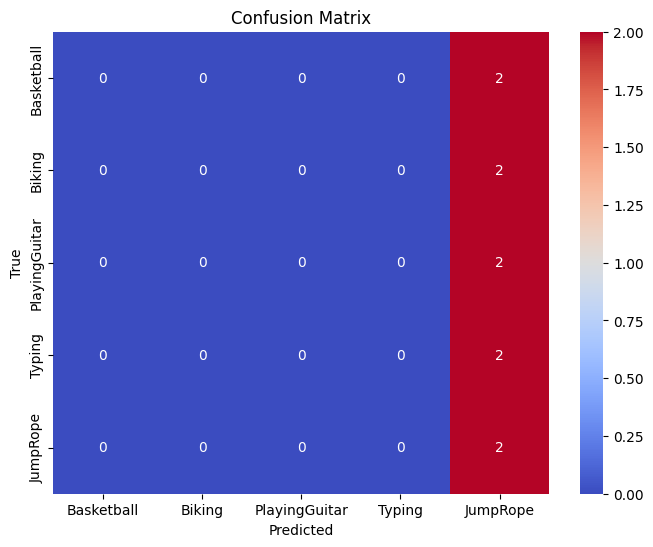

In [13]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=SELECTED_CLASSES))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=SELECTED_CLASSES, yticklabels=SELECTED_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


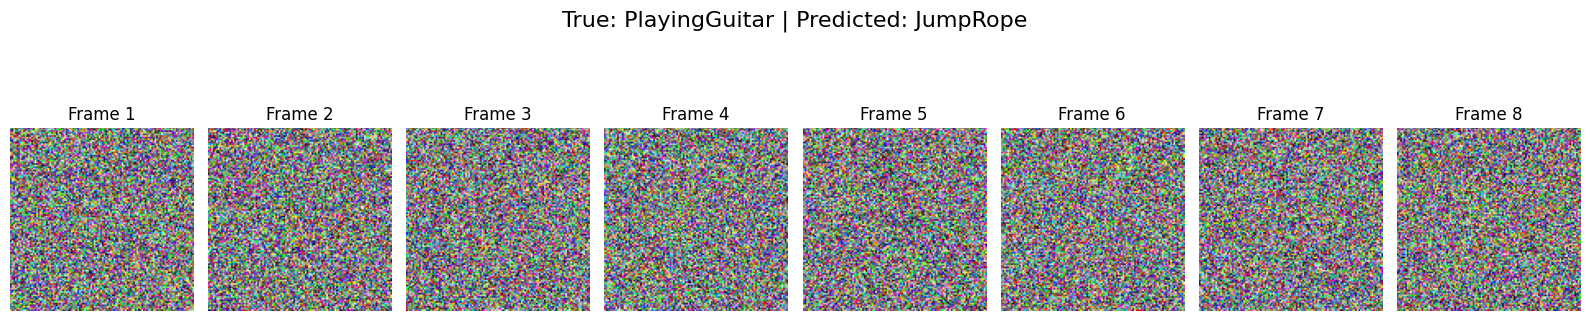

In [14]:

import random

idx = random.randint(0, len(X_test) - 1)
video = X_test[idx]
true_label = SELECTED_CLASSES[y_test[idx]]
predicted_label = SELECTED_CLASSES[y_pred[idx]]

plt.figure(figsize=(16, 4))
for i in range(min(8, video.shape[0])):
    plt.subplot(1, 8, i+1)
    plt.imshow(video[i])
    plt.axis('off')
    plt.title(f"Frame {i+1}")

plt.suptitle(f"True: {true_label} | Predicted: {predicted_label}", fontsize=16)
plt.tight_layout()
plt.show()
